In [1]:
import pandas as pd


In [2]:
my_data = pd.read_csv('clean_data.csv')

In [ ]:
my_data.head(30)

In [4]:
downloaded_data = pd.read_csv('downloaded_car_dataset.csv')

In [5]:
downloaded_data = downloaded_data.drop(columns=['car_ID'])

In [ ]:
downloaded_data.head(15)

In [ ]:
my_data.dtypes

In [ ]:
my_data.sort_values(by=['price'], ascending=False)

In [9]:
#without bucking the worst prediction was around 200B off, with bucketing the worst prediction was 219K off

#bucketing some ext colors to reduce dimensions for regression
ext_colors = my_data['ext_color'].value_counts()
uncommon_colors = list(ext_colors[ext_colors <= 20].index)
len(uncommon_colors)
my_data['ext_color'] = my_data['ext_color'].replace(uncommon_colors, 'rare color')

Rosso Corsa Exterior              249
Bianco Avus Exterior              178
Red Exterior                      116
Nero Exterior                      82
Black Exterior                     80
                                 ... 
Tour De France Blue Exterior        1
Blu Mirabeau Metallic Exterior      1
Blu Mirabeau 525 Exterior           1
Roso Corsa Exterior                 1
Rosso Maranello Exterior            1
Name: ext_color, Length: 139, dtype: int64

In [16]:
#bucketing some int colors to reduce dimensions for regression
int_colors = my_data['int_color'].value_counts()
uncommon_int_colors = list(int_colors[int_colors <= 20].index)
len(uncommon_int_colors)
my_data['int_color'] = my_data['int_color'].replace(uncommon_int_colors, 'rare interior')

In [17]:
my_data['int_color'].value_counts()

Nero Leather Seats                528
rare interior                     341
Cuoio Leather Seats               189
Black Leather Seats               184
Rosso Ferrari Leather Seats       139
Beige Tradizione Leather Seats     75
Tan Leather Seats                  73
Beige Leather Seats                62
Red Leather Seats                  46
Charcoal Leather Seats             37
Bordeaux Leather Seats             28
Sabbia Leather Seats               23
Name: int_color, dtype: int64

In [18]:
my_data.shape

(1725, 12)

In [19]:
#analysis using my data
my_data = pd.get_dummies(my_data, drop_first=True)


In [20]:
my_data.shape

(1725, 77)

In [21]:
my_data.head(30)

,price,mileage,mpg,year,engine_size,name_ 360 Modena,name_ 360 Spider,name_ 458 Italia Coupe,name_ 458 Speciale Coupe,name_ 458 Spider,...,transmission_6-Speed Shiftable Automatic Transmission,transmission_7-Speed Automatic Transmission,transmission_7-Speed Shiftable Automatic Transmission,transmission_8-Speed Automatic Transmission,transmission_Automatic Transmission,transmission_Manual Transmission,rwd_yes,condition_Used,engine_info_8-Cylinder Gas Engine,engine_info_8-Cylinder Turbo Gas Engine
0,157995,13432,19.5,2017,3.9,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
1,237474,1228,19.0,2020,3.9,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
2,319990,2788,18.5,2019,3.9,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,259800,20298,14.0,2015,6.3,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,395900,821,14.0,2019,6.5,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
5,377999,9147,14.0,2020,6.5,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
6,349800,9432,12.5,2004,3.6,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
7,110000,24372,16.5,2014,4.3,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
8,274900,7463,18.5,2016,3.9,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
9,309900,12007,18.5,2018,3.9,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [22]:
#for regression the Y will be the price
y = my_data['price']

#X will be all the columns that contribute to the price
X = my_data.drop(columns = ['price'], axis=1)

In [23]:
#X.head(15)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, max_error

In [28]:
#splitting to train and test using train test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [31]:
#fit the model using the train data
reg = LinearRegression().fit(X_train, y_train)

#predicted values
pred = reg.predict(X_test)

In [32]:
#checking some error stats
mae = mean_absolute_error(y_test, pred)
print('The mean absolute error is: ', mae)

18046.024982383104

In [36]:
#checking some error stats
top_error = max_error(y_test, pred)
print('The maximum error is: ', top_error)

the maximum error is:  218791.28935544193


In [34]:
print(reg.score(X_test, y_test))

0.9510344843061856


C:\Users\erikc\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

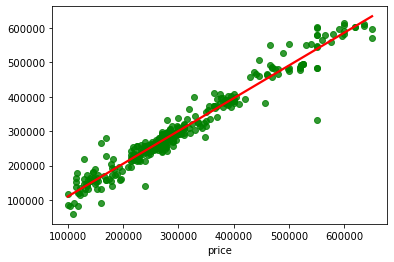

In [38]:
#my data summary/visualisations with christmas colors
import seaborn as sns

sns.regplot(y_test, pred, ci=None, scatter_kws={"color": "green"}, line_kws = {'color': 'red'})

In [ ]:
#checking some values of the coefficients and also the intercept
print(reg.coef_)
print(reg.intercept_)
print(X_test.columns.values)

In [ ]:
model1_sum = pd.DataFrame()
model1_sum['coefficient_change'] = reg.coef_
model1_sum['intercept'] = reg.intercept_
model1_sum['coefficient_name'] = X_test.columns.values
model1_sum['intercept'] = model1_sum['intercept'].apply('{:,.2f}'.format)
model1_sum['coefficient_change'] = model1_sum['coefficient_change'].apply('{:.2f}'.format)
model1_sum['coefficient_change'] = model1_sum['coefficient_change'].apply(pd.to_numeric)
model1_sum

In [73]:
pd.set_option('display.max_rows', 10)
model1_sum_sorted = model1_sum.sort_values(by=['coefficient_change'], ascending=False)
model1_sum_sorted

,coefficient_change,intercept,coefficient_name
11,236134.41,"-23,587,702.09",name_ 488 Pista Spider
16,234296.87,"-23,587,702.09",name_ 812 GTS
7,201405.52,"-23,587,702.09",name_ 458 Speciale Coupe
10,182300.86,"-23,587,702.09",name_ 488 Pista Coupe
24,66910.09,"-23,587,702.09",name_ F8 Spider
...,...,...,...
19,-134206.95,"-23,587,702.09",name_ California T
23,-140521.33,"-23,587,702.09",name_ F430 Spider
5,-160657.83,"-23,587,702.09",name_ 360 Spider
4,-178982.98,"-23,587,702.09",name_ 360 Modena


In [72]:
#my_data.sort_values(by=['price'], ascending=False)

<AxesSubplot:xlabel='coefficient_name'>

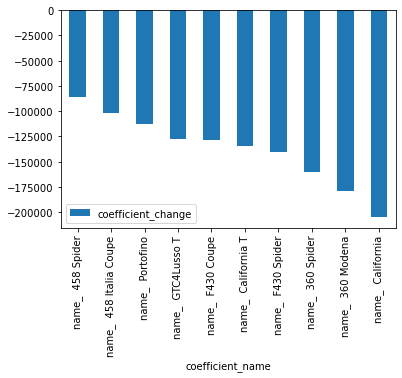

In [69]:
#top ten features that decrease value in a ferrari
model1_sum_sorted.tail(10).plot.bar(x='coefficient_name', y='coefficient_change')

<AxesSubplot:xlabel='coefficient_name'>

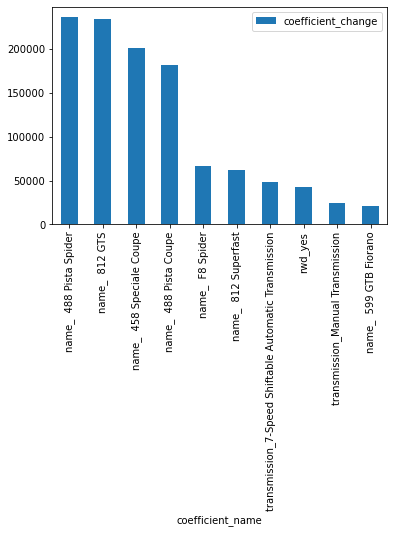

In [70]:
#the top 10 features that add value in a ferrari
model1_sum_sorted.head(10).plot.bar(x='coefficient_name', y='coefficient_change')

In [82]:
!pip install shap
import shap

  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [83]:
explainer = shap.Explainer(reg, X_train, feature_names=X_test.columns.values)
shap_values = explainer(X_test)

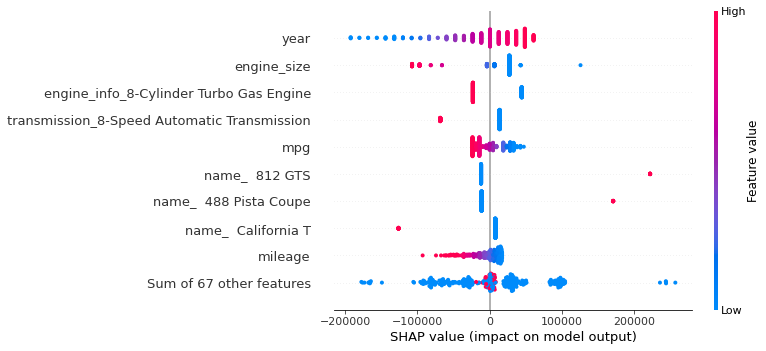

In [84]:
shap.plots.beeswarm(shap_values)

In [ ]:
#using downloaded data
downloaded_data = pd.get_dummies(downloaded_data, drop_first=True)

y2 = downloaded_data['price']
X2 = downloaded_data.drop(columns = ['price'])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .2, random_state = 42)

model2 = LinearRegression().fit(X2_train, y2_train)

In [ ]:
print(model2.score(X2_test, y2_test))

In [74]:
pd.__version__

'1.3.4'

In [75]:
sns.__version__

'0.11.2'

In [ ]:
#!pip list